In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')
##Direción de la imagen
PATH = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Rust/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Intento umbralización OTSU**

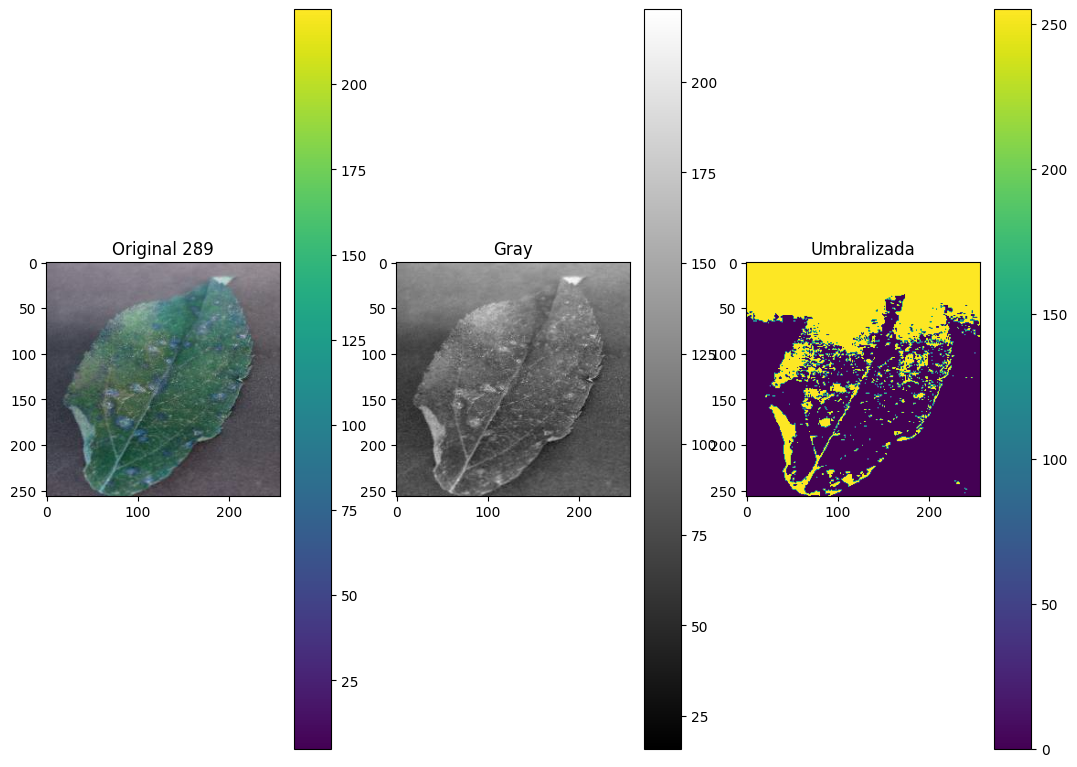

In [48]:
import cv2
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)

#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Aplicar la umbralización
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#visualizacion
plt.figure(figsize=(12.8,9.6))
plt.subplot(131)
plt.imshow(img)
plt.title('Original '+ name)
plt.colorbar()

plt.subplot(132)
plt.imshow(img_gray,"gray")
plt.title('Gray')
plt.colorbar()

plt.subplot(133)
plt.imshow(thresh)
plt.title('Umbralizada')
plt.colorbar()

plt.show()

# **Intento 2**

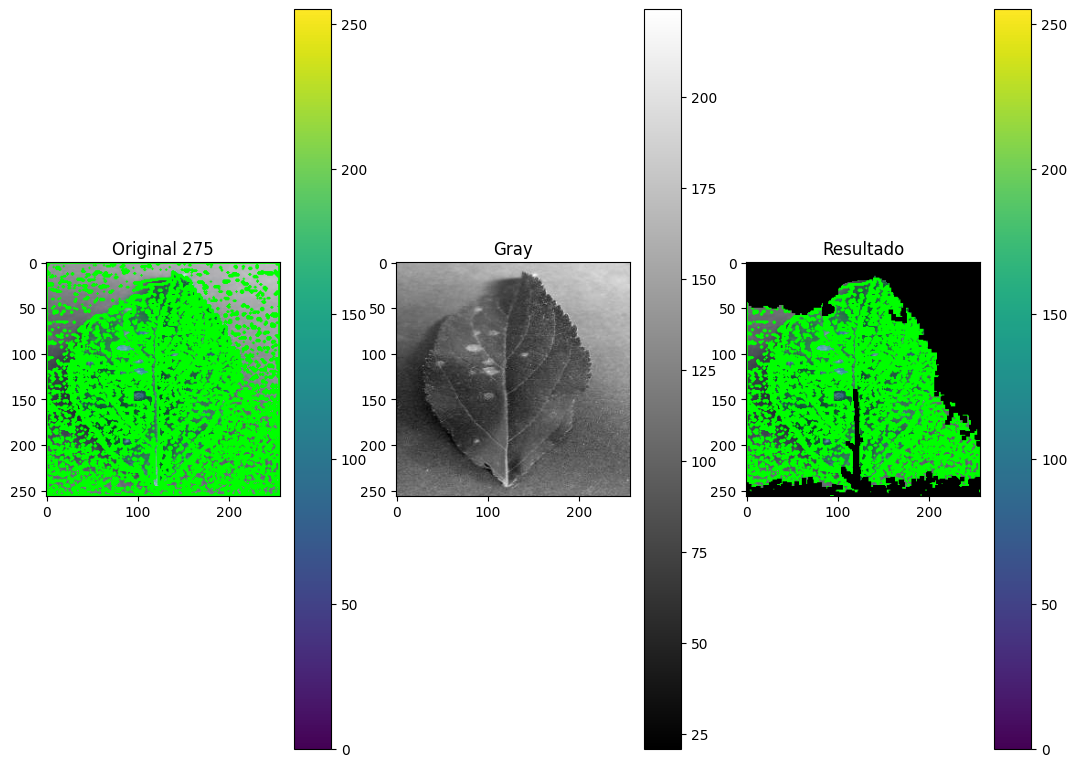

In [47]:
ret, binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar la transformada de distancia
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# Aplicar umbralización a la distancia transformada para obtener los contornos
ret, markers = cv2.threshold(dist_transform, 0.05 * dist_transform.max(), 255, 0)

# Convertir los marcadores a tipo uint8
markers = markers.astype('uint8')

# Encontrar los contornos
contours, hierarchy = cv2.findContours(markers, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara para las hojas
mask = cv2.drawContours(np.zeros_like(img), contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
result = cv2.bitwise_and(img, mask)

# Mostrar la imagen resultante
#visualizacion
plt.figure(figsize=(12.8,9.6))
plt.subplot(131)
plt.imshow(img)
plt.title('Original '+ name)
plt.colorbar()

plt.subplot(132)
plt.imshow(img_gray,"gray")
plt.title('Gray')
plt.colorbar()

plt.subplot(133)
plt.imshow(result)
plt.title('Resultado')
plt.colorbar()

plt.show()

Mismo codigo anterior modificando dist_transform

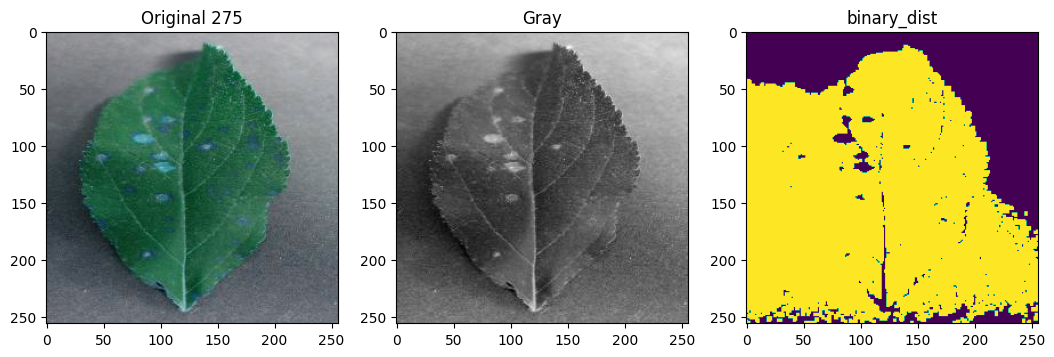

In [35]:
# Aplicar umbralización para obtener una imagen binaria
ret2, binary2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Definir el tamaño del kernel personalizado
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Aplicar la transformada de distancia
dist_transform2 = cv2.distanceTransform(opening, cv2.DIST_L2, cv2.DIST_MASK_3)

# Normalizar la distancia transformada para visualización
cv2.normalize(dist_transform2, dist_transform, 0, 1.0, cv2.NORM_MINMAX)
#dist_transform2_gray = cv2.RGB2GRAY(dist_transform)
ret, binary_dist = cv2.threshold(dist_transform2, 0.1 * dist_transform.max(), 255, 0)


#visualizacion
plt.figure(figsize=(12.8,9.6))
plt.subplot(131)
plt.imshow(img)
plt.title('Original '+ name)

plt.subplot(132)
plt.imshow(img_gray,"gray")
plt.title('Gray')

plt.subplot(133)
plt.imshow(binary_dist)
plt.title('binary_dist')


plt.show()

# **Segmentación por detección de bordes CANNY**

Text(0.5, 1.0, 'Resultado')

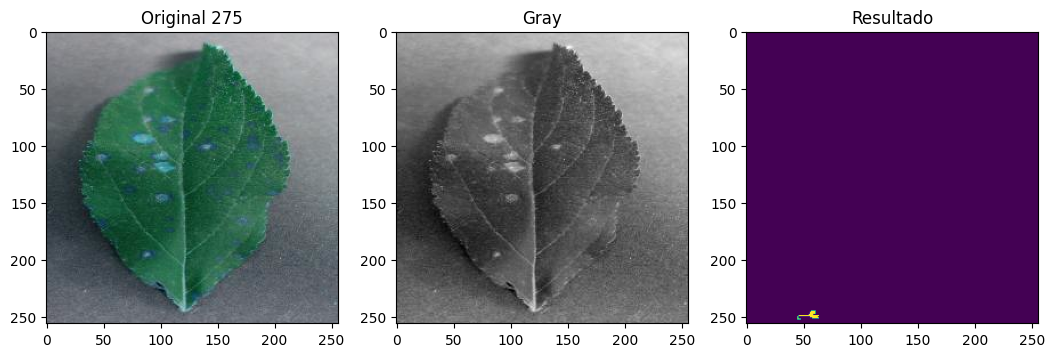

In [40]:
ret, binary3 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar la detección de bordes con Canny
edges = cv2.Canny(binary, 30, 70)  # Ajusta los valores de umbral según tus necesidades

# Encontrar los contornos de los bordes
# Encontrar los contornos de los bordes
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar el segundo contorno más grande
largest_contour = None
second_largest_contour = None
largest_area = -1
second_largest_area = -1

for contour in contours:
    area = cv2.contourArea(contour)
    if area > largest_area:
        second_largest_contour = largest_contour
        second_largest_area = largest_area
        largest_contour = contour
        largest_area = area
    elif area > second_largest_area:
        second_largest_contour = contour
        second_largest_area = area

# Crear una imagen en blanco del mismo tamaño que la original
height, width = img.shape[:2]
result = np.zeros((height, width), dtype=np.uint8)

# Dibujar el segundo contorno más grande con valor de píxel 255
if second_largest_contour is not None:
    cv2.drawContours(result, [second_largest_contour], 0, 255, cv2.FILLED)

    #visualizacion
plt.figure(figsize=(12.8,9.6))
plt.subplot(131)
plt.imshow(img)
plt.title('Original '+ name)

plt.subplot(132)
plt.imshow(img_gray,"gray")
plt.title('Gray')

plt.subplot(133)
plt.imshow(result)
plt.title('Resultado')

# **Contornos**

Text(0.5, 1.0, 'Contornos')

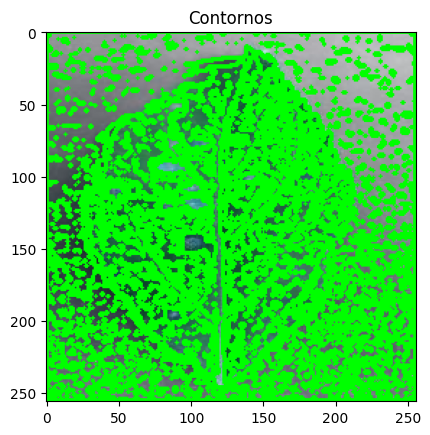

In [44]:


# Aplicar umbralización adaptativa
binary = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Detección de contornos
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar todos los contornos en la imagen original
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plt.subplot(111)
plt.imshow(img)
plt.title('Contornos')


# **Segmentación por color**

**Segmentación de color verde**

Text(0.5, 1.0, 'Color')

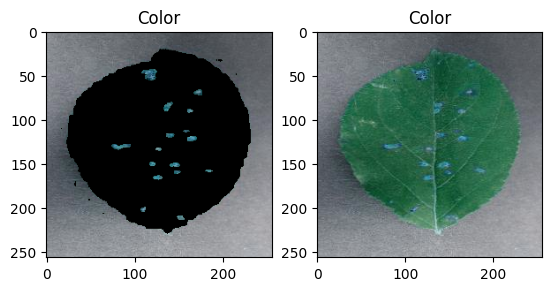

In [54]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)

plt.subplot(121)
plt.imshow(result)
plt.title('Color')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Segmentación por color gris

Text(0.5, 1.0, 'Color')

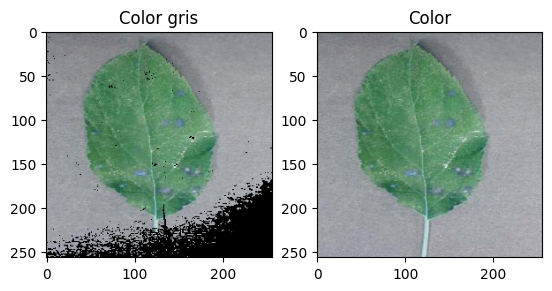

In [77]:
# Definir el rango de color gris
lower_gray = 50  # Ajusta el valor según tus necesidades
upper_gray = 150  # Ajusta el valor según tus necesidades

# Aplicar la umbralización para segmentar el color gris
mask2 = cv2.inRange(img_gray, lower_gray, upper_gray)

# Aplicar la máscara a la imagen original
result2 = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(121)
plt.imshow(result2)
plt.title('Color gris')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Imagen binarizada

TypeError: ignored

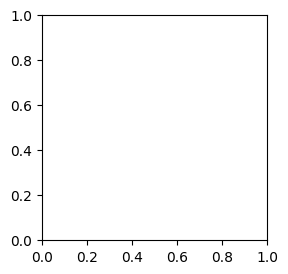

In [74]:
gray_segmentation = cv2.imread('result2.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 1  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)


plt.subplot(121)
plt.imshow(binary_segmentation)
plt.title('binary_segmentation')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

**Aplicando umbralización de la imagen**

Text(0.5, 1.0, 'Binaria')

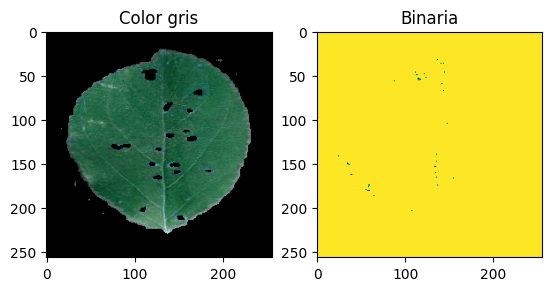

In [59]:
_, binary = cv2.threshold(img_gray, lower_gray, upper_gray, cv2.THRESH_BINARY)


plt.subplot(121)
plt.imshow(result2)
plt.title('Color gris')

plt.subplot(122)
plt.imshow(binary)
plt.title('Binaria')
#cv2.imshow('Bordes', edges)

**Aplicando operación morfológica de expansión**

Text(0.5, 1.0, 'Img original')

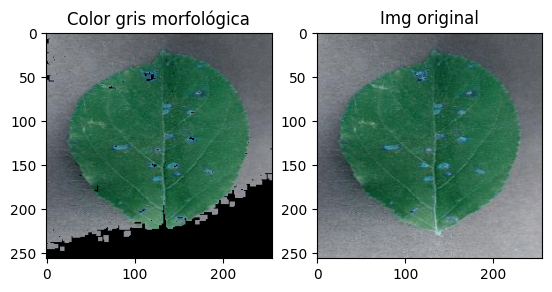

In [57]:
mask3 = cv2.inRange(img_gray, lower_gray, upper_gray)

# Aplicar una operación de apertura para mejorar la segmentación
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_opened = cv2.morphologyEx(mask3, cv2.MORPH_OPEN, kernel)

# Aplicar la máscara abierta a la imagen original
result3 = cv2.bitwise_and(img, img, mask=mask_opened)

#Visualización
plt.subplot(121)
plt.imshow(result3)
plt.title('Color gris morfológica')

plt.subplot(122)
plt.imshow(img)
plt.title('Img original')

# **Segmentación por textura**

Text(0.5, 1.0, 'Img original')

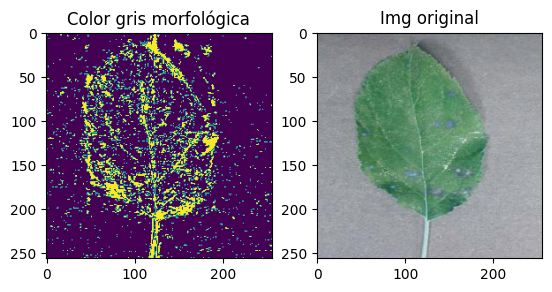

In [72]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#image = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

U, sigma, Vt = np.linalg.svd(image, full_matrices=False)

# Tomar los primeros k componentes singulares
k = 5  # Ajusta este valor según tus necesidades

# Reconstruir la imagen comprimida
compressed_image = np.dot(U[:, :k] * sigma[:k], Vt[:k, :])

# Ajustar las dimensiones de la imagen comprimida
compressed_image = compressed_image.astype(np.uint8)
compressed_image = cv2.resize(compressed_image, (image.shape[1], image.shape[0]))

# Calcular la diferencia entre la imagen original y la imagen comprimida
diff = cv2.absdiff(image, compressed_image)

# Aplicar una umbralización para segmentar la textura
threshold = 10  # Ajusta este valor según tus necesidades
_, binary_t = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

#Visualización
plt.subplot(121)
plt.imshow(binary_t)
plt.title('Color gris morfológica')

plt.subplot(122)
plt.imshow(img)
plt.title('Img original')

